In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

In [2]:
DATADIR = 'C:/Users/mine/Desktop/PetImages'
CATEGORIES = ['Dog', 'Cat']

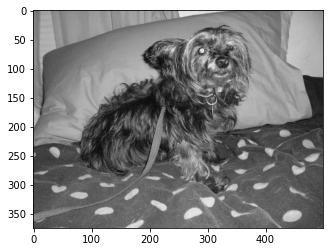

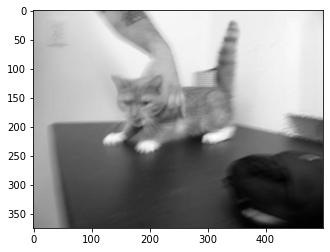

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break

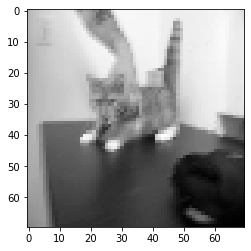

In [5]:
img_size = 70
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap ='gray')
plt.show()

In [6]:
training_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_train_data()

In [7]:
import random
random.shuffle(training_data)

In [8]:
x = []
y = []

for feature, labels in training_data:
    x.append(feature)
    y.append(labels)
    
x = np.array(x).reshape(-1, img_size, img_size, 1)

In [9]:
# Normalize the pixel values to be between 0 and 1
X = np.array([i[0] for i in training_data]).reshape(-1, img_size, img_size, 1) / 255.0
y = np.array([i[1] for i in training_data])

In [12]:
# Convert the target labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, len(CATEGORIES))

In [13]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((19956, 70, 70, 1), (4990, 70, 70, 1), (19956, 2), (4990, 2))

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Define the input shape of the images
input_shape = (img_size, img_size, 1)

# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3),1, padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(CATEGORIES)))
model.add(Activation('sigmoid'))

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_val, y_val),
                    verbose=1)



Epoch 1/50
624/624 [==============================] - 391s 622ms/step - loss: 0.6728 - accuracy: 0.5836 - val_loss: 0.6175 - val_accuracy: 0.6721
Epoch 2/50
624/624 [==============================] - 363s 582ms/step - loss: 0.6345 - accuracy: 0.6505 - val_loss: 0.5886 - val_accuracy: 0.7126
Epoch 3/50
624/624 [==============================] - 362s 581ms/step - loss: 0.6047 - accuracy: 0.6749 - val_loss: 0.5314 - val_accuracy: 0.7497
Epoch 4/50
624/624 [==============================] - 364s 583ms/step - loss: 0.5724 - accuracy: 0.7078 - val_loss: 0.4690 - val_accuracy: 0.7756
Epoch 5/50
624/624 [==============================] - 370s 593ms/step - loss: 0.5406 - accuracy: 0.7348 - val_loss: 0.4741 - val_accuracy: 0.7731
Epoch 6/50
624/624 [==============================] - 365s 585ms/step - loss: 0.5137 - accuracy: 0.7509 - val_loss: 0.4347 - val_accuracy: 0.7970
Epoch 7/50
624/624 [==============================] - 366s 587ms/step - loss: 0.4948 - accuracy: 0.7598 - val_loss: 0.4317 -

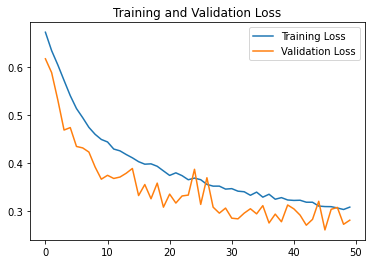

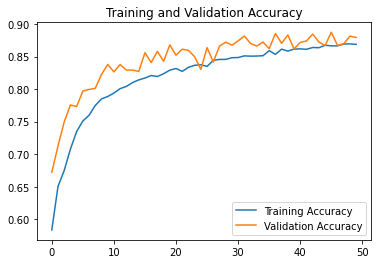

In [22]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy values
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.2810264229774475
Test accuracy: 0.87935870885849


In [41]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(r'C:\Users\mine\Desktop\PetImages\Cat\7024.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the image to the input shape of the model
img = cv2.resize(img, (img_size, img_size))

# Normalize the pixel values to be between 0 and 1
img = img / 255.0

# Reshape the image to match the input shape of the model
img = np.reshape(img, (1, img_size, img_size, 1))

# Make the prediction
prediction = model.predict(img)

# Print the predicted probabilities
print('Probabilities:', prediction)

# Check if the predicted probability is greater than 0.5
if prediction[0][0] > 0.5:
    print('The image is a dog')
else:
    print('The image is a cat')


1/1 [==============================] - 0s 52ms/step
Probabilities: [[0.13935177 0.8609099 ]]
The image is a cat
